# Bin Packing Lab

- Authors:
  - Sevhena Walker, walkes31@mcmaster.ca
  - , email
- Group ID on Avenue: group 52
- Gitlab URL:

## T1: Understand The Code Base

#### Solid Principles
S - In terms of how the code follows the single-responsability principle, each class and function serves one purpose.

O - The design follows the open/closed principle as more components can be added to the code without modifying existing components. This is easily seen in the bin packer design where you have different types of bin packers (offline, online) and there could possibly be more in the future if such a thing was wanted.

L - The design follows the Liskov Substituion principle since all dependent classes can be used in place of their superclasses without any erors occuring. Any overrides seen in the algorithms for the offline and online binpackers do not make any significant changes.

I - This design clearly follows interface segragation by the use of the BinPacker interface. This allows for the initalizing of different types of bin packers (offline, online) that still follow the same baseline.

D - In the code design there are multiple classes that depend on abstract classes (BinppReader depends on DatasetReader, NextFit has two versions that each depend on an online and offline version of the Binpacker interface) Any changes made to these subclasses won't affect the superclass. If any changes need to be made to any of the methods of the superclasse, then there only need to be an override method initialized in the subclass.

#### Dataset Comprehension

The files found in the prefixed *binpp* folders follow the same format. The first line in each file gives the number *n* of weighted items in the file. The second line gives the max capacity *c* of the bins and the rest of the file is simply the n individual items listed by their respective weights.

The files in the *jburkardt* come in triples with a file ending in *_c*, *_s* and *_w*. The *_c* file gives the capacity of the bins, the *_s* file matches up with the *_w* file as they have the same number of data values. Each line of the *_s* file says how many items of the weight in the *_w* are to be packed. 

#### Reading jburkardt Files

In [ ]:
from macpacking.reader import JburkardtReader

In [ ]:
dataset_c = '_datasets/jburkardt/p04_c.txt'
dataset_s = '_datasets/jburkardt/p04_s.txt'
dataset_w = '_datasets/jburkardt/p04_w.txt'
reader: DatasetReader = JburkardtReader(dataset_c, dataset_s, dataset_w)
print(f'Dataset: {dataset_c}')
print(f'Dataset: {dataset_s}')
print(f'Dataset: {dataset_w}')
print(f'  - Bin Capacity: {reader.offline()[0]}')
print(f'  - Objects to pack: {sorted(reader.offline()[1])}')

#### The Worst Bin Packing Algorithm To Ever Exist

In [ ]:
from macpacking.algorithms.online import BadNextFit

In [ ]:
strategy: Online = BadNextFit()
result = strategy(reader.online())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

## T2: Implement And Benchmark Algorithms

#### More Data

In [ ]:
from macpacking.reader import DatasetReader, BinppReader

In [ ]:
# dataset = '_datasets/binpp/N1C1W1/N1C1W1_B.BPP.txt'
# reader: DatasetReader = BinppReader(dataset)
# print(f'Dataset: {dataset}')
# print(f'  - Bin Capacity: {reader.offline()[0]}')
# print(f'  - Objects to pack: {sorted(reader.offline()[1])}')

In [ ]:
# dataset = '_datasets/binpp-hard/HARD0.BPP.txt'
# reader: DatasetReader = BinppReader(dataset)
# print(f'Dataset: {dataset}')
# print(f'  - Bin Capacity: {reader.offline()[0]}')
# print(f'  - Objects to pack: {sorted(reader.offline()[1])}')

#### Online Algorithms

In [ ]:
from macpacking.model  import Online, Offline, Multiway
import macpacking.algorithms.online as online
import macpacking.algorithms.offline as offline

**Next Fit**

In [ ]:
strategy: Online = online.NextFit()
result = strategy(reader.online())
count: int = strategy.counting_compares()
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')
print(count)

**First Fit**

In [ ]:
strategy: Online = online.FirstFit()
result = strategy(reader.online())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

**Best Fit**

In [ ]:
strategy: Online = online.BestFit()
result = strategy(reader.online())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

**Worst Fit**

In [ ]:
strategy: Online = online.WorstFit()
result = strategy(reader.online())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

#### Offline Algorithms

**Next Fit Decreasing**

In [ ]:
strategy: Offline = offline.NextFit()
result = strategy(reader.offline())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

**First Fit Decreasing**

In [ ]:
strategy: Offline = offline.FirstFitDecreasing()
result = strategy(reader.offline())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

**Best Fit Decreasing**

In [ ]:
strategy: Offline = offline.BestFitDecreasing()
result = strategy(reader.offline())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

**Worst Fit Decreasing**

In [ ]:
strategy: Offline = offline.WorstFitDecreasing()
result = strategy(reader.offline())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

#### KPIs

#### Benchmarking For Classical Algorithms

In [ ]:
from pyperf import BenchmarkSuite
from os.path import exists

bench_datafile = 'outputs/bench.json'
if not exists(bench_datafile):
    raise UserWarning('You must execute the benchmark before exploring the results!')

In [ ]:
!{'python -m pyperf hist outputs/bench.json'}

In [ ]:
def extract_benchmark_algos(file: str) -> set[str]:
    suite = BenchmarkSuite.load(file)
    context = suite.get_benchmark_names()
    return set(map(lambda c: c.split('-')[0], context))

In [ ]:
files = extract_benchmark_algos(bench_datafile)
print(files)

In [ ]:
def load_bench_measurements(name: str, json_filename: str) -> list[float]:
    """extract the values for a given benchmark"""
    suite = BenchmarkSuite.load(json_filename)
    bench = suite.get_benchmark(name)
    return list(bench.get_values())

In [ ]:
Next_Fit_off_vals = []; Next_Fit_on_vals = []
First_Fit_off_vals = []; First_Fit_on_vals = []
Best_Fit_off_vals = []; Best_Fit_on_vals = []
Worst_Fit_off_vals = []; Worst_Fit_on_vals = []

for file in files:
    #print(file)
    name = file.split()[2]
    #print(name)
    match name:
        case 'NF_Off':
            Next_Fit_off_vals += load_bench_measurements(file, bench_datafile)
        case 'NF_On':
            Next_Fit_on_vals += load_bench_measurements(file, bench_datafile)
        case 'FFDesc':
            First_Fit_off_vals += load_bench_measurements(file, bench_datafile)
        case 'FF':
            First_Fit_on_vals += load_bench_measurements(file, bench_datafile)
        case 'BFDesc':
            Best_Fit_off_vals += load_bench_measurements(file, bench_datafile)
        case 'BF':
            Best_Fit_on_vals += load_bench_measurements(file, bench_datafile)
        case 'WFDesc':
            Worst_Fit_off_vals += load_bench_measurements(file, bench_datafile)
        case 'WF':
            Worst_Fit_on_vals += load_bench_measurements(file, bench_datafile)
        case _:
            raise ValueError(name)

**Plot the Benchmark**

In [ ]:
from matplotlib import pyplot as plt

def draw_hist(values: list[float], title: str, canvas):
    canvas.set_title(title)
    canvas.set(xlabel='exec time (s)', ylabel='|instances|')
    canvas.hist(values, 20) # putting values into 10 beans

In [ ]:
fig, axes = plt.subplots(1,2, sharex = False, sharey= True)
draw_hist(Next_Fit_off_vals, "Next Fit Offline", axes[0]) 
draw_hist(Next_Fit_on_vals, "Next Fit Online", axes[1]) 
fig.set_size_inches(8,4)
fig.tight_layout()
fig.savefig('outputs/histogram_NF.pdf')

In [ ]:
fig, axes = plt.subplots(1,2, sharex = False, sharey= True)
draw_hist(First_Fit_off_vals, "First Fit Offline", axes[0])
draw_hist(First_Fit_on_vals, "First Fit Online", axes[1])
fig.set_size_inches(8,4)
fig.tight_layout()
fig.savefig('outputs/histogram_FF.pdf')

In [ ]:
fig, axes = plt.subplots(1,2, sharex = False, sharey= True)
draw_hist(Best_Fit_off_vals, "Best Fit Offline", axes[0])
draw_hist(Best_Fit_on_vals, "Best Fit Online", axes[1])
fig.set_size_inches(8,4)
fig.tight_layout()
fig.savefig('outputs/histogram_BF.pdf')

In [ ]:
fig, axes = plt.subplots(1,2, sharex = False, sharey= True)
draw_hist(Worst_Fit_off_vals, "Worst Fit Offline", axes[0])
draw_hist(Worst_Fit_on_vals, "Worst Fit Online", axes[1])
fig.set_size_inches(8,4)
fig.tight_layout()
fig.savefig('outputs/histogram_WF.pdf')

In [ ]:
def plot_box(values: list[float], names: str, canvas):
    canvas.boxplot(values, notch=True, labels=names)

In [ ]:
fig, ax = plt.subplots(1,8)

plot_box([Next_Fit_off_vals],['NF_Off'], ax[0])
plot_box([Next_Fit_on_vals],['Nf_on'], ax[1])
plot_box([First_Fit_off_vals],['FF_off'], ax[2])
plot_box([First_Fit_on_vals],['FF_on'], ax[3])
plot_box([Best_Fit_off_vals],['BF_off'], ax[4])
plot_box([Best_Fit_on_vals],['BF_on'], ax[5])
plot_box([Worst_Fit_off_vals],['WF_off'], ax[6])
plot_box([Worst_Fit_on_vals],['WF_on'], ax[7])

fig.set_size_inches(12,4)
fig.tight_layout()
fig.savefig('outputs/boxplot.pdf')

**Analysis**

## T3: Measure Improvement Margin

In [21]:
from os.path import exists
from json import load

bench_datafile = 'outputs/multi_bench.json'
if not exists(bench_datafile):
    raise UserWarning('You must execute the benchmark before exploring the results!')

## T4: Add Smarter Algorithms

## T5: From Fixed Capacity to Fixed Bins

In [22]:
import macpacking.algorithms.baseline as baseline

strategy: Multiway = baseline.BenMaierM()
result = strategy(reader.multiway(), 10)
sums = []
for r in result:
    sums.append(sum(r))
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')
print(f'sums of each bin = {sums}')

nb_bins = 10
[[252, 252, 127, 127, 127, 106, 106, 106, 106, 84, 37, 10, 10, 10, 9], [252, 252, 127, 127, 127, 106, 106, 106, 106, 84, 37, 10, 10, 10, 9], [252, 252, 127, 127, 127, 127, 106, 106, 85, 84, 37, 10, 10, 10, 9], [252, 252, 127, 127, 127, 127, 106, 106, 85, 84, 37, 10, 10, 10, 9], [252, 252, 127, 127, 127, 127, 106, 106, 85, 84, 37, 12, 10, 9], [252, 252, 252, 127, 127, 106, 106, 85, 84, 37, 12, 10, 10, 9], [252, 252, 252, 127, 127, 106, 106, 85, 85, 37, 12, 10, 9, 9], [252, 252, 252, 127, 127, 106, 106, 106, 46, 37, 37, 10, 9], [252, 252, 252, 127, 127, 106, 106, 106, 84, 37, 10, 9], [442, 252, 127, 127, 106, 106, 106, 85, 37, 37, 37]]
sums of each bin = [1462, 1468, 1467, 1469, 1469, 1461, 1469, 1469, 1469, 1469]


In [ ]:
import macpacking.algorithms.multiway as multiway

strategy: Multiway = multiway.MultiBestFit()
result = strategy(reader.multiway(), 10)
sums = []
for r in result:
    sums.append(sum(r))
print(f'nb_bins = {len(result)}')
print(f'{result}')
print(f'sums = {sums}')

source for multiway : https://github.com/erelsgl/prtpy/blob/main/prtpy/partitioning/multifit.py

**Benchmarking**

In [ ]:
from pyperf import BenchmarkSuite
from os.path import exists

bench_datafile = 'outputs/multi_bench.json'
if not exists(bench_datafile):
    raise UserWarning('You must execute the benchmark before exploring the results!')

In [ ]:
!{'python -m pyperf hist outputs/multi_bench.json'}

In [ ]:
def extract_benchmark_algos(file: str) -> set[str]:
    suite = BenchmarkSuite.load(file)
    context = suite.get_benchmark_names()
    return set(map(lambda c: c.split('-')[0], context))

In [ ]:
files = extract_benchmark_algos(bench_datafile)
print(files)

In [ ]:
def load_bench_measurements(name: str, json_filename: str) -> list[float]:
    """extract the values for a given benchmark"""
    suite = BenchmarkSuite.load(json_filename)
    bench = suite.get_benchmark(name)
    return list(bench.get_values())

In [26]:
Multi_Next_Fit = []; Multi_First_Fit = []
Multi_Best_Fit = []; Multi_Worst_Fit = []
Multi_Baseline = []

In [ ]:
for file in files:
    #print(file)
    name = file.split()[2]
    #print(name)
    match name:
        case 'MNF':
            Multi_Next_Fit += load_bench_measurements(file, bench_datafile)
        case 'MFF':
            Multi_First_Fit += load_bench_measurements(file, bench_datafile)
        case 'MBF':
            Multi_Best_Fit += load_bench_measurements(file, bench_datafile)
        case 'MWF':
            Multi_Worst_Fit += load_bench_measurements(file, bench_datafile)
        case 'BenMaierM':
            Multi_Baseline += load_bench_measurements(file, bench_datafile)
        case _:
            raise ValueError(name)

**Plot the Benchmark**

In [27]:
from matplotlib import pyplot as plt

def draw_hist(values: list[float], title: str, canvas):
    canvas.set_title(title)
    canvas.set(xlabel='exec time (s)', ylabel='|instances|')
    canvas.hist(values, 20) # putting values into 10 beans

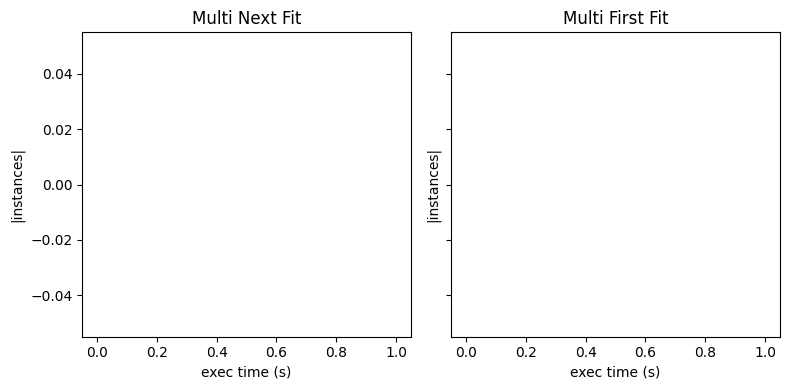

In [28]:
fig, axes = plt.subplots(1,2, sharex = False, sharey= True)
draw_hist(Multi_Next_Fit, "Multi Next Fit", axes[0]) 
draw_hist(Multi_First_Fit, "Multi First Fit", axes[1]) 
fig.set_size_inches(8,4)
fig.tight_layout()
fig.savefig('outputs/histogram_MNF_MFF.pdf')

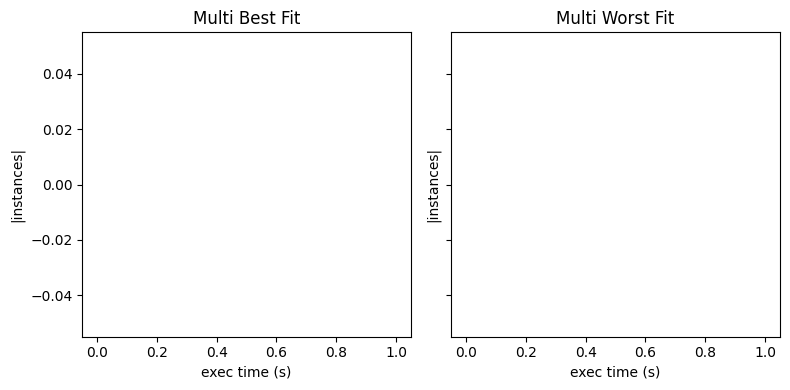

In [29]:
fig, axes = plt.subplots(1,2, sharex = False, sharey= True)
draw_hist(Multi_Best_Fit, "Multi Best Fit", axes[0])
draw_hist(Multi_Worst_Fit, "Multi Worst Fit", axes[1])
fig.set_size_inches(8,4)
fig.tight_layout()
fig.savefig('outputs/histogram_MBF_MWF.pdf')

In [30]:
# fig, axes = plt.subplots(1,2, sharex = False, sharey= True)
# draw_hist(Worst_Fit_off_vals, "Worst Fit Offline", axes[0])
# draw_hist(Worst_Fit_on_vals, "Worst Fit Online", axes[1])
# fig.set_size_inches(8,4)
# fig.tight_layout()
# fig.savefig('outputs/histogram_MBase.pdf')

In [31]:
def plot_box(values: list[float], names: str, canvas):
    canvas.boxplot(values, notch=True, labels=names)

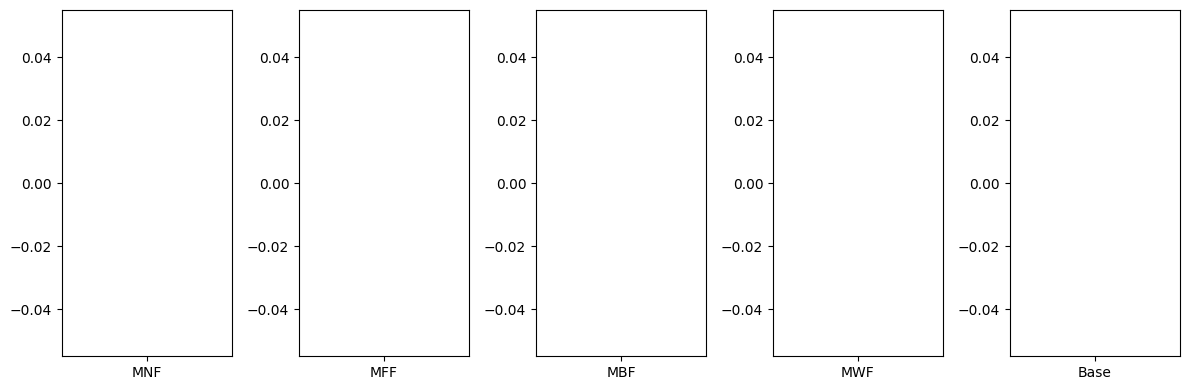

In [32]:
fig, ax = plt.subplots(1,5)

plot_box([Multi_Next_Fit],['MNF'], ax[0])
plot_box([Multi_First_Fit],['MFF'], ax[1])
plot_box([Multi_Best_Fit],['MBF'], ax[2])
plot_box([Multi_Worst_Fit],['MWF'], ax[3])
plot_box([Multi_Baseline],['Base'], ax[4])

fig.set_size_inches(12,4)
fig.tight_layout()
fig.savefig('outputs/boxplot_multi.pdf')

## Self-reflection questions

As part of the self-reflection dimension of an experiential course, each member of the group is expected to answer to the following four questions:

##### *Hassan*
  - What process did you go through to produce this result? (Backward)
  - What were your standards for this piece of work? Did you meet your standards? (Inward)
  - What the one thing you particularly want people to notice when they look at your work? (Outward)
  - What lessons will you keep from this reading/lecture in your professional practice? (Forward)

##### *Sevhena*
  - What process did you go through to produce this result? (Backward)
  - What were your standards for this piece of work? Did you meet your standards? (Inward)
  - What the one thing you particularly want people to notice when they look at your work? (Outward)
  - What lessons will you keep from this reading/lecture in your professional practice? (Forward)